# Statistical testing in the era of big data
Reproduces some plots from: "Ten ironic rules for non-statistical reviewers" by Karl Friston

In [1]:
#Imports
from scipy import special, stats
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha=0.05
range_d=[1, 1./2, 1./4, 1./8, 0]
d_labels=['large','medium','small','trivial','none']
range_N=range(2,150)

## Displaying PDFs

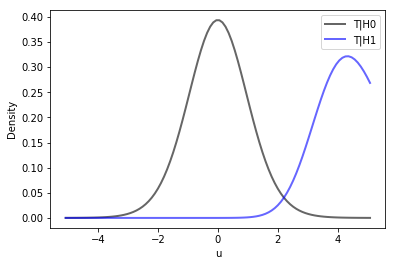

In [3]:
# Display PDF 

N=20 # sample size
d=1  # sensitivity

x = np.linspace(2*stats.nct.ppf(0.01, N-1, 0),2*stats.nct.ppf(0.99, N-1, 0), 100)

plt.plot(x, stats.nct.pdf(x, N-1, 0),color='black', lw=2, alpha=0.6, label='T|H0')
plt.plot(x, stats.nct.pdf(x, N-1, d*sqrt(N)),'b-', lw=2, alpha=0.6, label='T|H1')
plt.legend()
plt.ylabel("Density")
plt.xlabel("u")
plt.show()

## Sensitivity depends on sample size (N) and effect size (d)

In [4]:
def sensitivity(range_d,range_N):
    ''' Function that calculates sensitivity (array) for 
    lists effect size of sample size'''
    res_sens=np.empty((len(range_d),len(range_N)))
    for iter_d,d in enumerate(range_d):
        for iter_N,N in enumerate(range_N):
            degrees=N-1
            # Inverse cumulative distribution function of the non-central t distribution
            T_threshold=special.nctdtrit(degrees,0,1-alpha)
            # Cumulative distribution function of the non-central t distribution.
            sens=1-special.nctdtr(degrees,d*sqrt(N),T_threshold)
            res_sens[iter_d,iter_N]=sens
    return res_sens

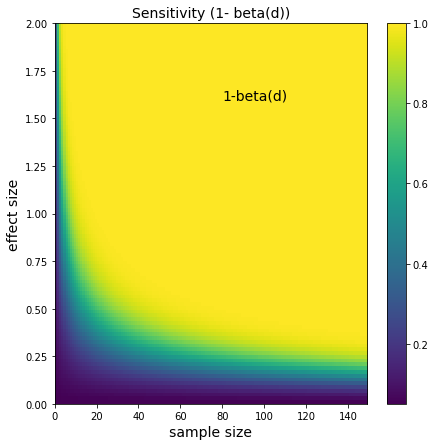

In [5]:
dense_d=np.linspace(2,0,101)
res_sens=sensitivity(dense_d,range_N)
plt.figure(figsize=(7,7))
plt.imshow(res_sens, interpolation='none', extent=[0,max(range_N),0,max(dense_d)],aspect='auto')
plt.xlabel('sample size',fontsize=14)
plt.ylabel('effect size',fontsize=14)
plt.title("Sensitivity (1- beta(d))",fontsize=14)
plt.text(80,1.6,"1-beta(d)",fontsize=14)
plt.colorbar();


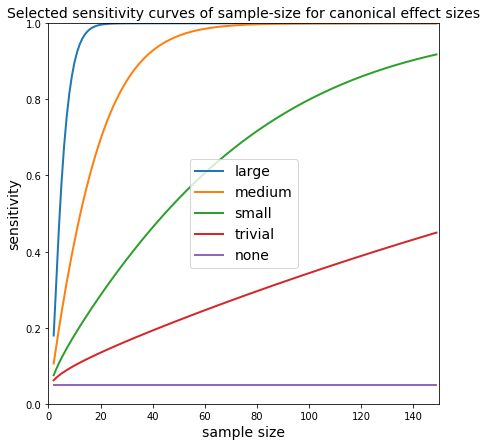

In [6]:
res_sens=sensitivity(range_d,range_N)

plt.figure(figsize=(7,7))
for iter_d,d in enumerate(range_d):
    plt.plot(range_N,res_sens[iter_d,:],'-',lw=2,label=d_labels[iter_d])

plt.xlabel('sample size',fontsize=14)
plt.ylabel('sensitivity',fontsize=14)
plt.title("Selected sensitivity curves of sample-size for canonical effect sizes",fontsize=14)
plt.xlim(0,max(range_N)+1) 
plt.ylim(0,1)
plt.legend(fontsize=14);